In [2]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)
install.packages('nycflights13')
library(nycflights13)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Lecture 5: Tidy Data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand what makes [tidy data](#Tidy-data) and why we care
* Make data wider and narrower
    
This lecture note corresponds to Chapter 6 of your book.
</div>


    




## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each value gets its own cell.
- Each different type of data set gets its own table.

Data tables which are not tidy are called messy!
![http://r4ds.had.co.nz/images/tidy-1.png](http://r4ds.had.co.nz/images/tidy-1.png)

In the following, we are going to ouput several tables data.  These `table` data are part of your `tidyverse` package.

In [3]:
print(table1)

# A tibble: 6 × 4
  country      year  cases population
  <chr>       <dbl>  <dbl>      <dbl>
1 Afghanistan  1999    745   19987071
2 Afghanistan  2000   2666   20595360
3 Brazil       1999  37737  172006362
4 Brazil       2000  80488  174504898
5 China        1999 212258 1272915272
6 China        2000 213766 1280428583


The above table shows TB cases documented by WHO in various countries.
In the above data set, each column is a variable and every entry in a column has a single value. It also meets all the other requirements for qualifying as being tidy. Therefore this data set is tidy.

Now let us take a look at the following data set obtained by merging the cases and population into the `type` variable.

In [4]:
print(table2)

# A tibble: 12 × 4
   country      year type            count
   <chr>       <dbl> <chr>           <dbl>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In the type column, you have two variables: cases and population.   For data to be tidy, each variable needs to be in each column.  So this data is messy.

In [ ]:
How about the following table?

In [5]:
table3 %>% print

# A tibble: 6 × 3
  country      year rate             
  <chr>       <dbl> <chr>            
1 Afghanistan  1999 745/19987071     
2 Afghanistan  2000 2666/20595360    
3 Brazil       1999 37737/172006362  
4 Brazil       2000 80488/174504898  
5 China        1999 212258/1272915272
6 China        2000 213766/1280428583


The above table is also messy, because the counts for cases and population is defined as a division in the variable rate.  So this data is also messy.

In [6]:
print(table4a) # cases in one tibble
print(table4b) # population in another one

# A tibble: 3 × 3
  country     `1999` `2000`
  <chr>        <dbl>  <dbl>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766
# A tibble: 3 × 3
  country         `1999`     `2000`
  <chr>            <dbl>      <dbl>
1 Afghanistan   19987071   20595360
2 Brazil       172006362  174504898
3 China       1272915272 1280428583


The above is a messy data, since the values in the variable `year` are now column names

Recapping: tidy data means

* each observation has its own row
* each variable has its own column
* each value has its own cell

## Why we care about tidy data
The tools we have learned so far all live in the `tidyverse`. This means that each tool expects to receive tidy data as input, and, where necessary, returns tidy data as output. You can think of tidy data as a sort of contract that everything in `tidyverse` respects. This makes it possible to string many tidyverse commands together using `%>%`  without having to worry about whether they all work together.

For instance, let us calculate rate of cases per 10000 people for the data in `table1`.

In [7]:
mutate(table1, rate = cases / population * 10000) # rate of cases per 10000 people

country,year,cases,population,rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


How would we calculate the `rate` variable using `table2`?

In [ ]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [ ]:
#  mutate(table2, rate=???)  not possible to use mutate

Summary commands like `summarize` and `count` also preserve tidy data:

In [9]:
count(table1, year, wt = cases) # compute no. of cases for each year

year,n
<dbl>,<dbl>
1999,250740
2000,296920


`ggplot` also expects tidy data.  What if we plot a table with a messy data?

In [ ]:
print(table2)

# A tibble: 12 x 4
   country      year type            count
   <chr>       <int> <chr>           <int>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


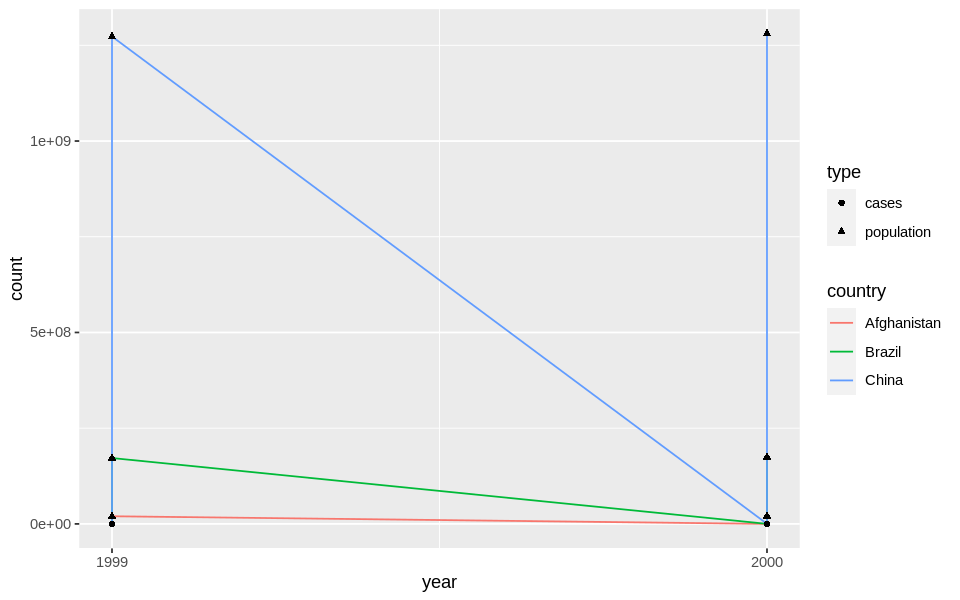

In [12]:
ggplot(table2, aes(x = year, y = count)) +
    geom_line(aes(color = country)) +
    geom_point(aes(shape = type)) +
    scale_x_continuous(breaks = c(1999, 2000))

I am not sure what is going on in the above plot with a messy data.

**Remark:** Extremely important to only use the functions we have learnt for tidy data.

## Creating tidy data
If the data is not already tidy, then we might need to some work before we can use the tools in `dplyr`. The package `tidyr` inside `tidyverse` allows one to convert data into the tidy data.

### Making data longer
One common problem in when a variable is spread across multiple columns and we need to gather those columns to create a new pair of variables. For example, consider `table4a` from above:

In [13]:
print(table4a)

# A tibble: 3 × 3
  country     `1999` `2000`
  <chr>        <dbl>  <dbl>
1 Afghanistan    745   2666
2 Brazil       37737  80488
3 China       212258 213766


Here there is a year variable which is spread across two columns. To become tidy, it should get its own `year` column. We want to make the data *longer* by taking the year columns and combining them into one column:
![gather illustration](http://r4ds.had.co.nz/images/tidy-9.png)

The command to do this is called `pivot_longer()`. To use it, we need to tell R three things:

1. which existing columns ( the **cols** ) should have been the values of a variable?
2. what is the name of the new variable (the **names**) whose values currently appear as column names?
3. what is the name of the new variable (the **values**) whose values are currently spread over the many columns (shown in point 1 above) cell?

(When using `pivot_longer()`, neither the **names** nor **values** column names currently exist in your data. They are "destination" columns in the new table.)

In [14]:
# pivot table4a with default arguments
pivot_longer(table4a, cols= c('1999', '2000'))

country,name,value
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


Notice how R chose default names "name" and "value" for the new columns it created. We can change those to be more informative using the options `names_to=` and `values_to=`:

In [16]:
# pivot table4a with informative column names
pivot_longer(
            table4a, cols = c('1999', '2000'),
            names_to = 'year',
            values_to = 'tb_cases'
)

country,year,tb_cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


## Wider data
Another type of problem is when an observation is scattered across multiple rows. Here we want to do the opposite of gather: we want to make the data **wider** by spreading these rows out into new columns.
![spread data](http://r4ds.had.co.nz/images/tidy-8.png)

The command to do this is called `pivot_wider`. To use it we need to specify two things:

* which existing column has the variable **names**?
* which existing column has the **values** for those variables?

### Exercise
Convert `table2` to tidy format using `pivot_wider()`.

In [20]:
print(table2)

# A tibble: 12 × 4
   country      year type            count
   <chr>       <dbl> <chr>           <dbl>
 1 Afghanistan  1999 cases             745
 2 Afghanistan  1999 population   19987071
 3 Afghanistan  2000 cases            2666
 4 Afghanistan  2000 population   20595360
 5 Brazil       1999 cases           37737
 6 Brazil       1999 population  172006362
 7 Brazil       2000 cases           80488
 8 Brazil       2000 population  174504898
 9 China        1999 cases          212258
10 China        1999 population 1272915272
11 China        2000 cases          213766
12 China        2000 population 1280428583


In [22]:
# make table2 wider by separating cases and population into different columns
pivot_wider(table2, names_from = 'type', values_from = 'count')

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [18]:
?pivot_wider

## Summary

* `pivot_longer` tends to make wide tables narrower and longer
* `pivot_wider` tends to make long tables shorter and wider
* They are inverses -- each one undos the other.

Another use for these commands is to create data in a format that is better for humans to read.
Some tables are more readable if they are put in a non-tidy format. This is often the case with time data.

### Exercise
Re-create the following table which shows monthly departures from the three NYC airports:
```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

In [25]:
# spread nycflights out to show departures by month for each airport
# install.packages('nycflights13')
flights %>%
  count(origin, month) %>%
  pivot_wider(
              names_from = 'month',
              values_from = 'n'
  )

origin,1,2,3,4,5,6,7,8,9,10,11,12
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
EWR,9893,9107,10420,10531,10592,10175,10475,10359,9550,10104,9707,9922
JFK,9161,8421,9697,9218,9397,9472,10023,9983,8908,9143,8710,9146
LGA,7950,7423,8717,8581,8807,8596,8927,8985,9116,9642,8851,9067


## Example: `gapminder`
`gapminder` is a library of socioeconomic data collected over time and across many different countries:

In [28]:
install.packages('gapminder')
library(gapminder)
gapminder %>% print

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# ℹ 1,694 more rows


These data are in tidy format. We can easily do things like plot population over time (for example):

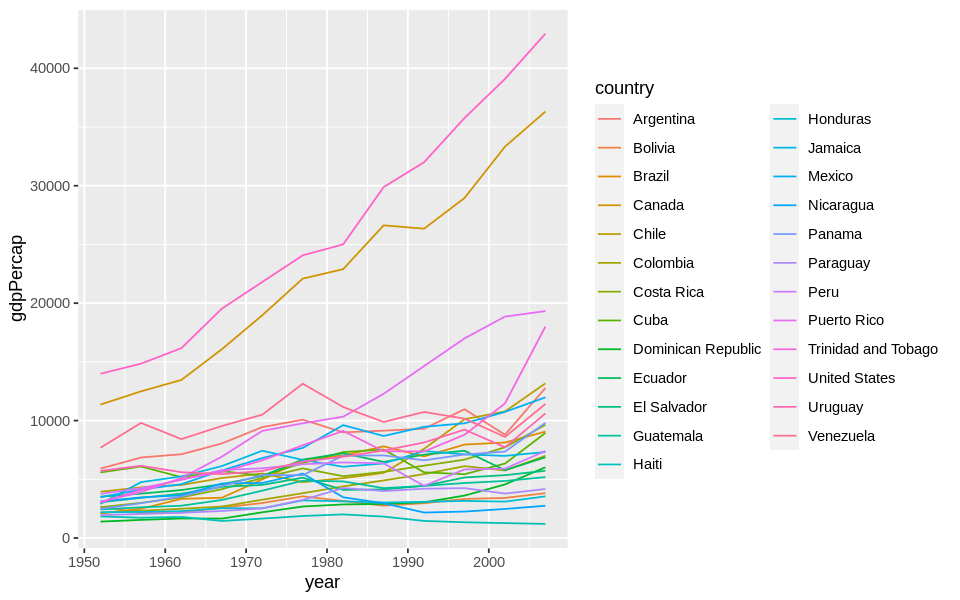

In [29]:
gapminder %>%
  filter(continent == "Americas") %>%
    ggplot(aes(x = year, y = gdpPercap, color = country)) +
      geom_line()

With lots of different countries, it is (arguably) easier to present these data in tabular form. To do this, we need to untidy the data and place years along the horizontal axis:

In [ ]:
# make gapminder wider

## Making wide data using more than one column
Consider the following simple table.

In [ ]:
grades <- tribble(
    ~person, ~exam, ~q1, ~q2, ~q3,
    "alice", "mt1", 1, 2, 3.5,
    "alice", "mt2", .5, 2.5, 1.5,
    "bob", "mt1", 0.0, 1.0, 1.5,
    "bob", "mt2", 1.5, 2.5, 2.0
)

In [ ]:
print(grades)

# A tibble: 4 × 5
  person exam     q1    q2    q3
  <chr>  <chr> <dbl> <dbl> <dbl>
1 alice  mt1     1     2     3.5
2 alice  mt2     0.5   2.5   1.5
3 bob    mt1     0     1     1.5
4 bob    mt2     1.5   2.5   2  


Suppose we want to expand this into multiple columns `q1_mt1`, `q2_mt2`, and so on. How should we use `pivot_wider()`?

In [ ]:
# spread using multiple values

## Example: Climate data

The [Global Historical Climate Network](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) is amazing database of daily weather data going back, in some cases, >100 years. Here is the downloaded daily observation data for Ann Arbor from 1991 to present:

In [ ]:
load(url("https://datasets.stats306.org/a2weather.RData"))
print(a2weather)

# A data frame: 11,304 × 128
   id        year month element VALUE1 MFLAG1 QFLAG1 SFLAG1 VALUE2 MFLAG2 QFLAG2
   <chr>    <int> <int> <chr>    <int> <chr>  <chr>  <chr>   <int> <chr>  <chr> 
 1 USC0020…  1891    10 TMAX       206 " "    " "    "6"       267 " "    " "   
 2 USC0020…  1891    10 TMIN        78 " "    " "    "6"       139 " "    " "   
 3 USC0020…  1891    10 PRCP        NA " "    " "    " "        NA " "    " "   
 4 USC0020…  1891    11 TMAX        78 " "    " "    "6"        28 " "    " "   
 5 USC0020…  1891    11 TMIN        11 " "    " "    "6"       -44 " "    " "   
 6 USC0020…  1891    11 PRCP         0 "P"    " "    "6"         0 "P"    " "   
 7 USC0020…  1891    11 SNOW         0 " "    " "    "6"         0 " "    " "   
 8 USC0020…  1891    12 TMAX        22 " "    " "    "6"        44 " "    " "   
 9 USC0020…  1891    12 TMIN       -94 " "    " "    "6"        11 " "    " "   
10 USC0020…  1892     1 TMAX       117 " "    " "    "6"        94 " "    " "   

Questions about these data:
- What do the columns mean? What are the units? How can we find this information out?
- What questions can we ask about these data?
  - Are the data in an appropriate format to answer these questions?
  - If not, how can we get them there?

In [ ]:
# analysis of a2weather